In [5]:
import sys
print(sys.executable)

c:\Users\jakub\AppData\Local\Programs\Python\Python312\python.exe


In [6]:
import pandas as pd
data = pd.read_csv('AB_NYC_2019.csv')

In [7]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
missing_values = data.isnull().sum()
print(missing_values)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [10]:
colsToDrop = ['id', 'host_name', 'last_review', "reviews_per_month"]
data.drop(colsToDrop, axis=1)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


In [11]:
data['price'].fillna(data['price'].mean())


0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='price'>

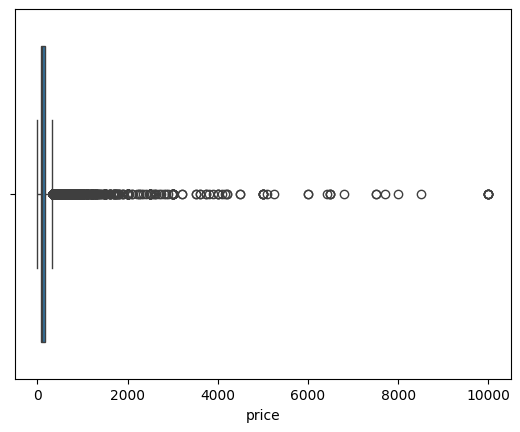

In [13]:
sns.boxplot(x=data['price'], data=data)

In [14]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)  
IQR = Q3 - Q1

print(IQR)

106.0


In [15]:
cleaned_data = data[(data['price'] > (Q1 - 1.5 * IQR)) & (data['price'] < (Q3 + 1.5 * IQR))]
print(cleaned_data)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

<Axes: xlabel='price'>

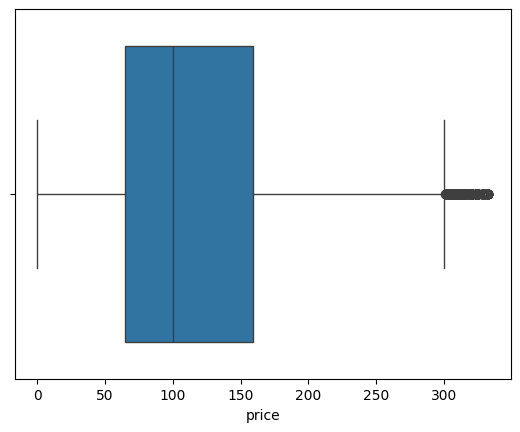

In [16]:
sns.boxplot(x=cleaned_data['price'], data=cleaned_data)

<Axes: xlabel='price'>

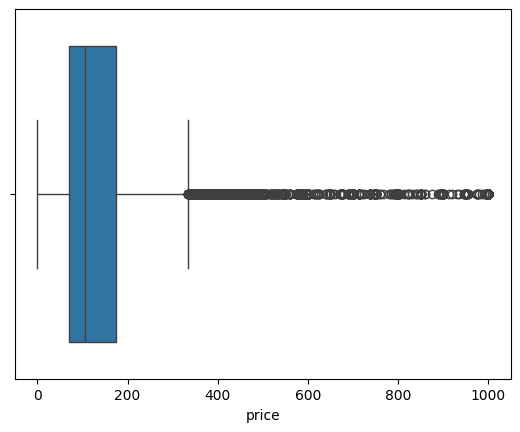

In [17]:
lower_bound = 0
upper_bound = 1000
data['price'] = data['price'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
sns.boxplot(x='price', data=data)

<Axes: xlabel='price'>

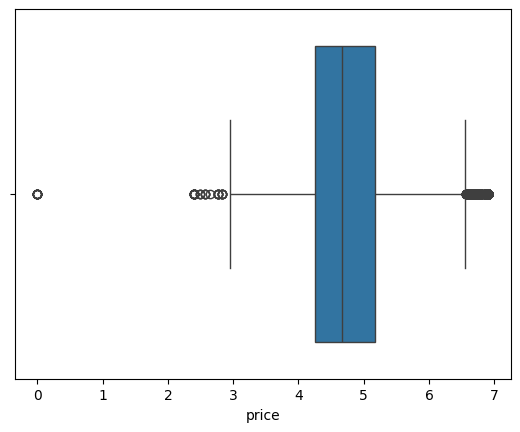

In [18]:
import numpy as np
data['price'] = np.log(data['price'] + 1)
sns.boxplot(x='price', data=data)

In [19]:
encoded_data = pd.get_dummies(data, columns=['room_type'])
encoded_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,5.010635,1,9,2018-10-19,0.21,6,365,False,True,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,5.420535,1,45,2019-05-21,0.38,2,355,True,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,5.017280,3,0,NaN,NaN,1,365,False,True,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,4.499810,1,270,2019-07-05,4.64,1,194,True,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,4.394449,10,9,2018-11-19,0.10,1,0,True,False,False
